# Brazilian E-Commerce Dataset ETL

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# Load all the CSVs into DataFrames
orders = pd.read_csv("../data/raw/olist_orders_dataset.csv")
order_reviews = pd.read_csv("../data/raw/olist_order_reviews_dataset.csv")
order_payments = pd.read_csv("../data/raw/olist_order_payments_dataset.csv")
order_items = pd.read_csv("../data/raw/olist_order_items_dataset.csv")
products = pd.read_csv("../data/raw/olist_products_dataset.csv")
sellers = pd.read_csv("../data/raw/olist_sellers_dataset.csv")
customers = pd.read_csv("../data/raw/olist_customers_dataset.csv")
geolocation = pd.read_csv("../data/raw/olist_geolocation_dataset.csv")
product_category_name_translation = pd.read_csv("../data/raw/product_category_name_translation.csv")

## 1 Exploratory Data Analysis

### 1.1 `orders` table

In [ ]:
print("Dataset Info:")
orders.info()
print("\nMissing Values:")
print(orders.isna().sum())
print("\nDescriptive Statistics:")
orders.describe()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB

Missing Values:
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
ord

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


In [17]:
print("First 5 Rows:")
orders.head()

First 5 Rows:


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [14]:
# Check uniqueness of keys
print("order_id uniqueness:", orders["order_id"].is_unique)

# Check categorical values
print("\norder_status unique values:", orders["order_status"].value_counts())

# Check order date ranges
date_columns = orders[["order_purchase_timestamp", "order_delivered_customer_date"]]
all_dates = date_columns.stack() # convert into a single column series for easy min/max
print(f"\nDate Range:\n{all_dates.min()} to {all_dates.max()}")

order_id uniqueness: True

order_status unique values: order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64

Date Range:
2016-09-04 21:15:19 to 2018-10-17 17:30:18


### 1.2 `order_reviews` table

In [ ]:
print("Dataset Info:")
order_reviews.info()
print("\nMissing Values:")
print(order_reviews.isna().sum())
print("\nDescriptive Statistics:")
order_reviews.describe()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB

Missing Values:
review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

Descriptive Statistics:


,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [19]:
print("First 5 Rows:")
order_reviews.head()

First 5 Rows:


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [ ]:
# Check the uniqueness of keys
print("review_id uniqueness:", order_reviews["review_id"].is_unique)
print("order_id uniqueness:", order_reviews["order_id"].is_unique)
composite_duplicates = order_reviews.duplicated(subset=['review_id', 'order_id']).sum()
print(f"Number of duplicate composite keys (review_id, order_id): {composite_duplicates}")

# Check review scores distribution
print("\nReview Scores Distribution:", order_reviews["review_score"].value_counts().sort_index())

# Check review creation and answer date ranges
review_date_columns = order_reviews[["review_creation_date", "review_answer_timestamp"]]
all_review_dates = review_date_columns.stack() # convert into a single column series for easy min/max
print(f"\nReview Date Range:\n{all_review_dates.min()} to {all_review_dates.max()}")

review_id uniqueness: False
order_id uniqueness: False
Number of duplicate composite keys: 0

Review Scores Distribution: review_score
1    11424
2     3151
3     8179
4    19142
5    57328
Name: count, dtype: int64

Review Date Range:
2016-10-02 00:00:00 to 2018-10-29 12:27:35


### 1.3 `order_payments` table

In [ ]:
print("Dataset Info:")
order_payments.info()
print("\nMissing Values:")
print(order_payments.isna().sum())
print("\nDescriptive Statistics:")
order_payments.describe()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB

Missing Values:
order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

Descriptive Statistics:


,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


In [25]:
print("First 5 Rows:")
order_payments.head()

First 5 Rows:


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [29]:
# Check the uniqueness of keys
print("order_id uniqueness:", order_payments["order_id"].is_unique)
print("payment_sequential uniqueness:", order_payments["payment_sequential"].is_unique)
composite_duplicates = order_payments.duplicated(subset=['order_id', 'payment_sequential']).sum()
print(f"Number of duplicate composite keys (order_id, payment_sequential): {composite_duplicates}")

# Check payment types distribution
print("\nPayment Types Distribution:", order_payments["payment_type"].value_counts())

order_id uniqueness: False
payment_sequential uniqueness: False
Number of duplicate composite keys (order_id, payment_sequential): 0

Payment Types Distribution: payment_type
credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: count, dtype: int64


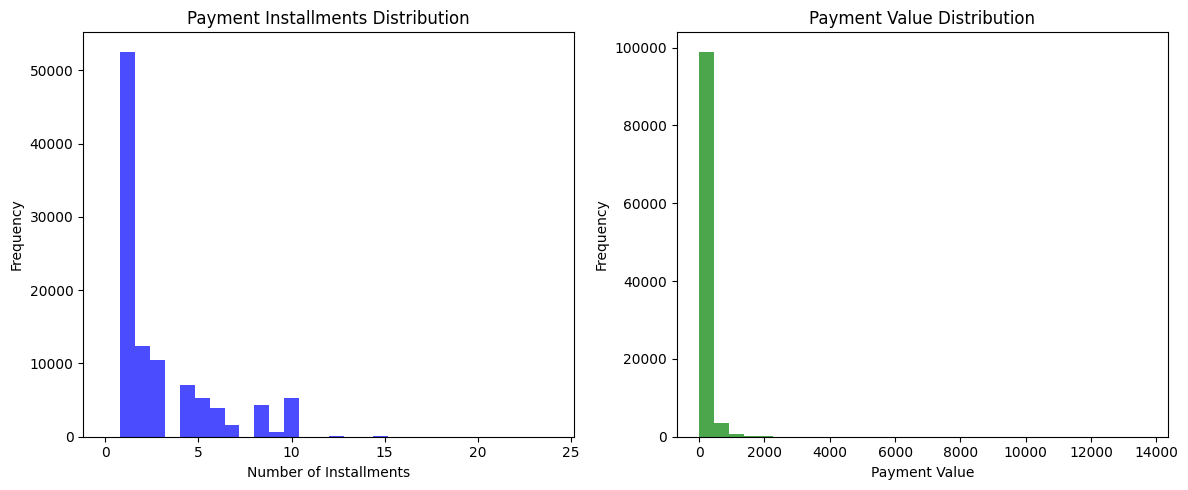

In [ ]:
# Plot distribution of payment installments and payment values
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(order_payments["payment_installments"], bins=30, color="blue", alpha=0.7)
plt.title("Payment Installments Distribution")
plt.xlabel("Number of Installments")

plt.ylabel("Frequency")
plt.subplot(1, 2, 2)
plt.hist(order_payments["payment_value"], bins=30, color="green", alpha=0.7)
plt.title("Payment Value Distribution")
plt.xlabel("Payment Value")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

### 1.4 `order_items` table 

In [ ]:
print("Dataset Info:")
order_items.info()
print("\nMissing Values:")
print(order_items.isna().sum())
print("\nDescriptive Statistics:")
order_items.describe()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB

Missing Values:
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

Descriptive Statistics:


,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


In [31]:
print("First 5 Rows:")
order_items.head()

First 5 Rows:


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [36]:
# Check uniqueness of keys
print("order_id uniqueness:", order_items["order_id"].is_unique)
print("order_item_id uniqueness:", order_items["order_item_id"].is_unique)
print("product_id uniqueness:", order_items["product_id"].is_unique)
print("seller_id uniqueness:", order_items["seller_id"].is_unique)
composite_duplicates = order_items.duplicated(subset=["order_id", "order_item_id", "product_id", "seller_id"]).sum()
print(f"Number of duplicate composite keys (order_id, order_item_id, product_id, seller_id): {composite_duplicates}")

order_id uniqueness: False
order_item_id uniqueness: False
product_id uniqueness: False
seller_id uniqueness: False
Number of duplicate composite keys (order_id, order_item_id, product_id, seller_id): 0


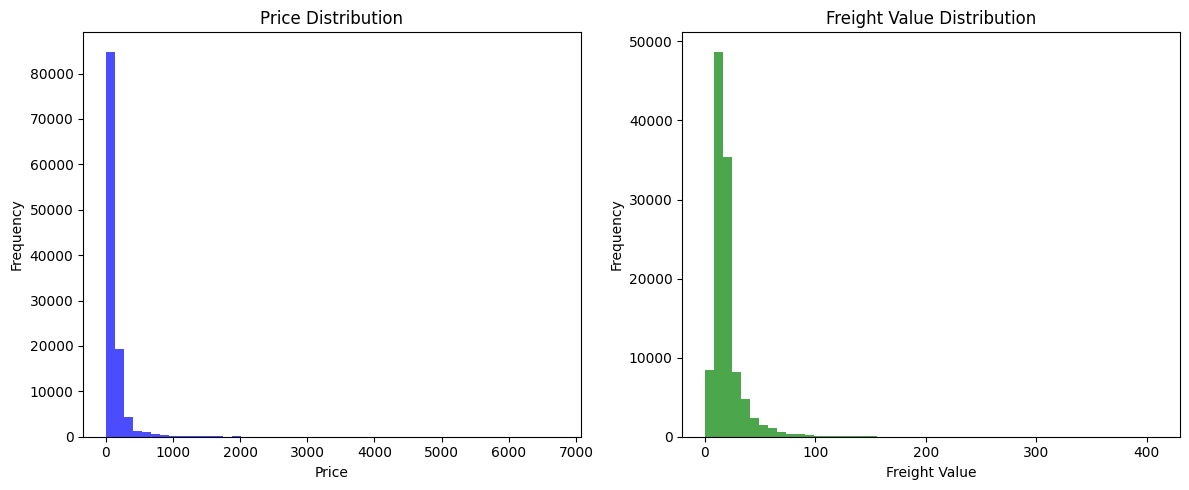

In [ ]:
# Plot distribution of price and freight value
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(order_items["price"], bins=50, color="blue", alpha=0.7)
plt.title("Price Distribution")
plt.xlabel("Price")
plt.ylabel("Frequency")

plt.subplot(1, 2, 2)
plt.hist(order_items["freight_value"], bins=50, color="green", alpha=0.7)
plt.title("Freight Value Distribution")
plt.xlabel("Freight Value")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

### 1.5 `products` table

In [38]:
print("Dataset Info:")
products.info()
print("\nMissing Values:")
print(products.isna().sum())
print("\nDescriptive Statistics:")
products.describe()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB

Missing Values:
product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weig

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [39]:
print("First 5 Rows:")
products.head()

First 5 Rows:


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [ ]:
# Check uniqueness of keys
print("product_id uniqueness:", products["product_id"].is_unique)

# Check categorical values
print("\nproduct_category_name unique values:", products["product_category_name"].value_counts())

product_id uniqueness: True

product_category_name unique values: product_category_name
cama_mesa_banho                  3029
esporte_lazer                    2867
moveis_decoracao                 2657
beleza_saude                     2444
utilidades_domesticas            2335
                                 ... 
fashion_roupa_infanto_juvenil       5
casa_conforto_2                     5
pc_gamer                            3
seguros_e_servicos                  2
cds_dvds_musicais                   1
Name: count, Length: 73, dtype: int64


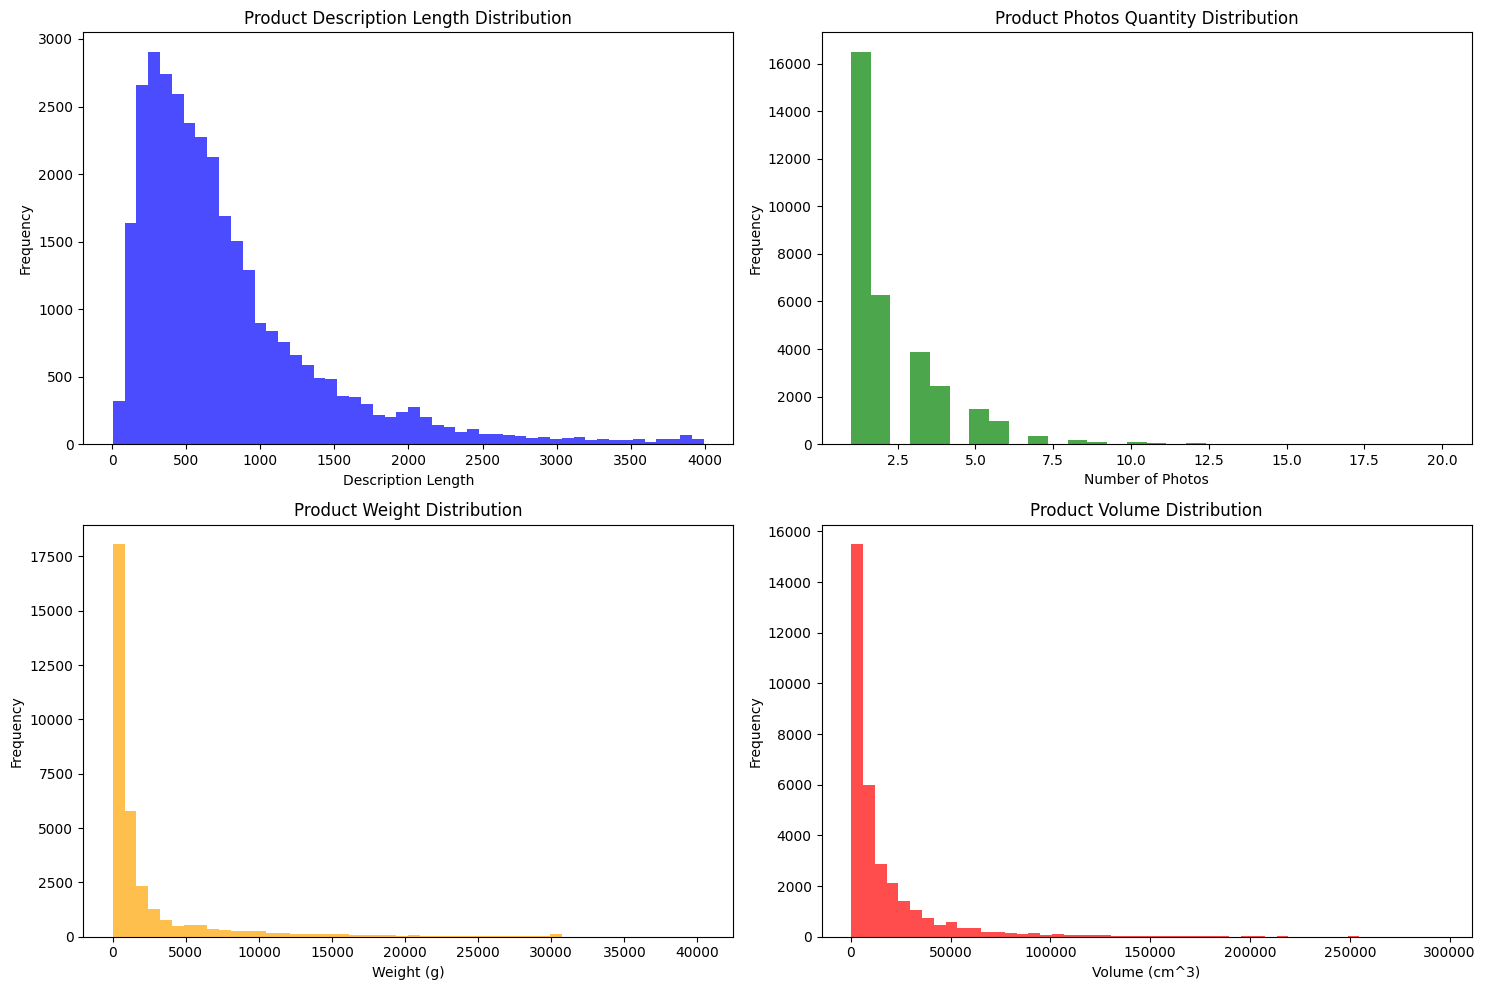

In [ ]:
# Histogram of product description lengths, product photo quantities, and weight/size metrics
# 3 x 3 plot grid
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
plt.hist(products["product_description_length"].dropna(), bins=50, color="blue", alpha=0.7)
plt.title("Product Description Length Distribution")
plt.xlabel("Description Length")
plt.ylabel("Frequency")
plt.subplot(2, 2, 2)
plt.hist(products["product_photos_qty"].dropna(), bins=30, color="green", alpha=0.7)
plt.title("Product Photos Quantity Distribution")
plt.xlabel("Number of Photos")
plt.ylabel("Frequency")
plt.subplot(2, 2, 3)
plt.hist(products["product_weight_g"].dropna(), bins=50, color="orange", alpha=0.7)
plt.title("Product Weight Distribution")
plt.xlabel("Weight (g)")
plt.ylabel("Frequency")
plt.subplot(2, 2, 4)
volumes = (products["product_length_cm"] * 
          products["product_width_cm"] * 
          products["product_height_cm"]).dropna()
plt.hist(volumes, bins=50, color="red", alpha=0.7)
plt.title("Product Volume Distribution")
plt.xlabel("Volume (cm^3)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

### 1.6 `sellers` table

In [ ]:
print("Dataset Info:")
sellers.info()
print("\nMissing Values:")
print(sellers.isna().sum())
print("\nDescriptive Statistics:")
sellers.describe()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB

Missing Values:
seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

Descriptive Statistics:


,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


In [50]:
print("First 5 Rows:")
sellers.head()

First 5 Rows:


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [59]:
# Check uniqueness of keys
print("seller_id uniqueness:", sellers["seller_id"].is_unique)

# Check categorical values
print("\nseller_city unique values:", sellers["seller_city"].value_counts())
print("\nseller_state unique values:", sellers["seller_state"].value_counts())

seller_id uniqueness: True

seller_city unique values: seller_city
sao paulo              694
curitiba               127
rio de janeiro          96
belo horizonte          68
ribeirao preto          52
                      ... 
taruma                   1
s jose do rio preto      1
domingos martins         1
messias targino          1
leme                     1
Name: count, Length: 611, dtype: int64

seller_state unique values: seller_state
SP    1849
PR     349
MG     244
SC     190
RJ     171
RS     129
GO      40
DF      30
ES      23
BA      19
CE      13
PE       9
PB       6
RN       5
MS       5
MT       4
RO       2
SE       2
PI       1
AC       1
MA       1
AM       1
PA       1
Name: count, dtype: int64


### 1.7 `customers` table

In [60]:
print("Dataset Info:")
customers.info()
print("\nMissing Values:")
print(customers.isna().sum())
print("\nDescriptive Statistics:")
customers.describe()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB

Missing Values:
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Descriptive Statistics:


,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


In [61]:
print("First 5 Rows:")
customers.head()

First 5 Rows:


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [63]:
# Check uniqueness of keys
print("customer_id uniqueness:", customers["customer_id"].is_unique)
print("customer_unique_id uniqueness:", customers["customer_unique_id"].is_unique)

# Check categorical values
print("\ncustomer_city unique values:", customers["customer_city"].value_counts())
print("\ncustomer_state unique values:", customers["customer_state"].value_counts())

customer_id uniqueness: True
customer_unique_id uniqueness: False

customer_city unique values: customer_city
sao paulo            15540
rio de janeiro        6882
belo horizonte        2773
brasilia              2131
curitiba              1521
                     ...  
bequimao                 1
andarai                  1
vargem grande            1
curvelandia              1
eugenio de castro        1
Name: count, Length: 4119, dtype: int64

customer_state unique values: customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: count, dtype: int64


### 1.8 `geolocation` table

In [64]:
print("Dataset Info:")
geolocation.info()
print("\nMissing Values:")
print(geolocation.isna().sum())
print("\nDescriptive Statistics:")
geolocation.describe()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB

Missing Values:
geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

Descriptive Statistics:


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


In [65]:
print("First 5 Rows:")
geolocation.head()

First 5 Rows:


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [70]:
# Check uniqueness of keys
print("geolocation_zip_code_prefix uniqueness:", geolocation["geolocation_zip_code_prefix"].is_unique)
print("geolocation_latitude uniqueness:", geolocation["geolocation_lat"].is_unique)
print("geolocation_longitude uniqueness:", geolocation["geolocation_lng"].is_unique)
print("geolocation_city uniqueness:", geolocation["geolocation_city"].is_unique)
print("geolocation_state uniqueness:", geolocation["geolocation_state"].is_unique)
composite_duplicates = geolocation.duplicated(subset=["geolocation_zip_code_prefix", "geolocation_lat", "geolocation_lng", "geolocation_city", "geolocation_state"]).sum()
print(f"Number of duplicate composite keys (geolocation_zip_code_prefix, geolocation_lat, geolocation_lng, geolocation_city, geolocation_state): {composite_duplicates}")

# Check categorical values
print("\ngeolocation_city unique values:", geolocation["geolocation_city"].value_counts())
print("\ngeolocation_state unique values:", geolocation["geolocation_state"].value_counts())

geolocation_zip_code_prefix uniqueness: False
geolocation_latitude uniqueness: False
geolocation_longitude uniqueness: False
geolocation_city uniqueness: False
geolocation_state uniqueness: False
Number of duplicate composite keys (geolocation_zip_code_prefix, geolocation_lat, geolocation_lng, geolocation_city, geolocation_state): 261831

geolocation_city unique values: geolocation_city
sao paulo               135800
rio de janeiro           62151
belo horizonte           27805
são paulo                24918
curitiba                 16593
                         ...  
jacuípe                      1
mar vermelho                 1
quebrangulo                  1
poço das trincheiras         1
poxim                        1
Name: count, Length: 8011, dtype: int64

geolocation_state unique values: geolocation_state
SP    404268
MG    126336
RJ    121169
RS     61851
PR     57859
SC     38328
BA     36045
GO     20139
ES     16748
PE     16432
DF     12986
MT     12031
CE     11674
PA     1